## load Dataset

In [103]:
import pandas as pd

data = pd.read_csv(r"C:\Users\HP\Desktop\Health Dataset.csv",index_col = 'Person ID')
data.head()

,Gender,Age,Job,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Has Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,No
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Normal,No
3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,Normal,No
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes


## Exploratory Data Analysis

In [104]:
data = pd.DataFrame(data)
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Job                      374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Has Sleep Disorder       374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 40.9+ KB


# Preprocessing and Cleaning

## Handling Nulls

In [105]:
# check on Nulls
data.isna().sum()

Gender                     0
Age                        0
Job                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Has Sleep Disorder         0
dtype: int64

## Handling Duplicates

In [106]:
# check on duplicates and values in each column
import numpy as np
# Gender
data['Gender'].value_counts()
data['Gender'] = data['Gender'].str.strip()
# Age
data['Age'].value_counts()
# Job
data['Job'] = data['Job'].str.strip()
data['Job'].value_counts()
# Sleep Duration
data['Sleep Duration'] = np.round(data['Sleep Duration'])
data['Sleep Duration'] = data['Sleep Duration'].astype('int64')
data['Sleep Duration'].value_counts()

Sleep Duration
8    145
6    122
7    107
Name: count, dtype: int64

In [107]:
# Quality of Sleep	
data.loc[:,'Quality of Sleep']
data.loc[:,'Quality of Sleep'].value_counts()

# Physical Activity Level
data['Physical Activity Level'].value_counts()
# Stress Level
data['Stress Level'].value_counts() 

# BMI Category
data['BMI Category'] = data['BMI Category'].str.strip()
data['BMI Category'] = data['BMI Category'].astype('str')
data['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

In [108]:
# Blood Pressure
data['Blood Pressure'].value_counts()

# Heart Rate
data['Heart Rate'].value_counts()

# Daily Steps
data['Daily Steps'].value_counts()

# Sleep Disorder
data['Sleep Disorder'] = data['Sleep Disorder'].str.strip()
data['Sleep Disorder'].value_counts()

# Has Sleep Disorder
data['Has Sleep Disorder'] = data['Has Sleep Disorder'].str.strip()
data['Has Sleep Disorder'] = data['Has Sleep Disorder'].astype('str')
data['Has Sleep Disorder'].value_counts()

Has Sleep Disorder
No     219
Yes    155
Name: count, dtype: int64

## handling Outliers

In [113]:
import numpy as np
numeric_df = data.select_dtypes(include=np.number)
numeric_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,
1,27,6,6,42,6,77,4200
2,28,6,6,60,8,75,10000
3,28,6,6,60,8,75,10000
4,28,6,4,30,8,85,3000
5,28,6,4,30,8,85,3000
6,28,6,4,30,8,85,3000
7,29,6,6,40,7,82,3500
8,29,8,7,75,6,70,8000
9,29,8,7,75,6,70,8000


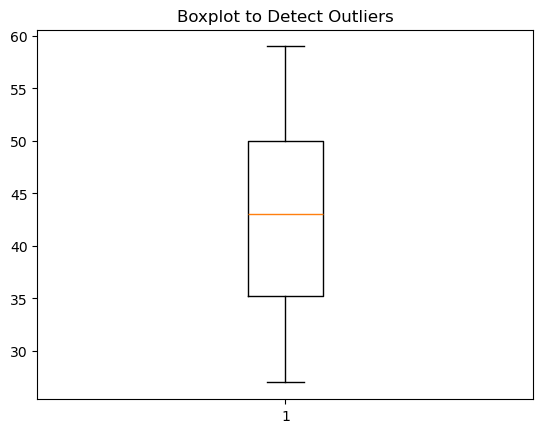

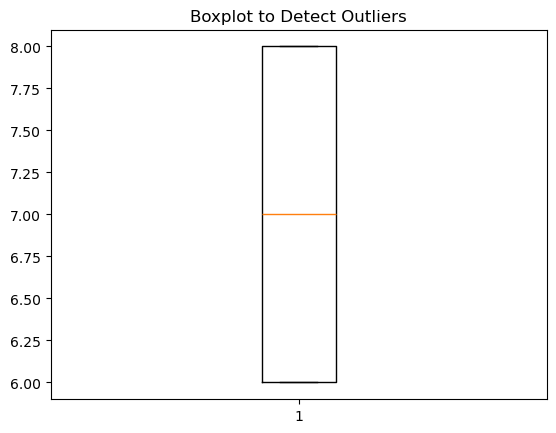

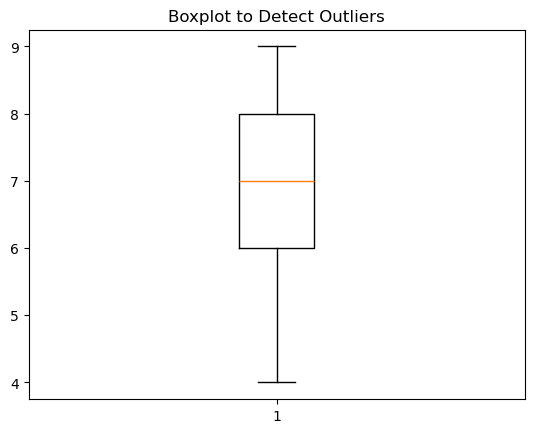

In [116]:
import matplotlib.pyplot as plt

# Age
plt.boxplot(data['Age'])
plt.title("Boxplot to Detect Outliers")
plt.show()

# Sleep Duration
plt.boxplot(data['Sleep Duration'])
plt.title("Boxplot to Detect Outliers")
plt.show()

# Quality of Sleep
plt.boxplot(data['Quality of Sleep'])
plt.title("Boxplot to Detect Outliers")
plt.show()

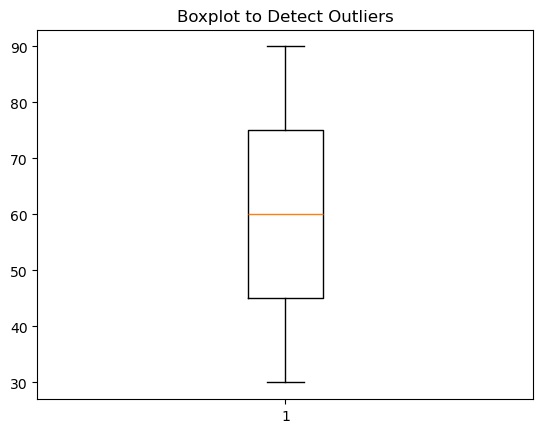

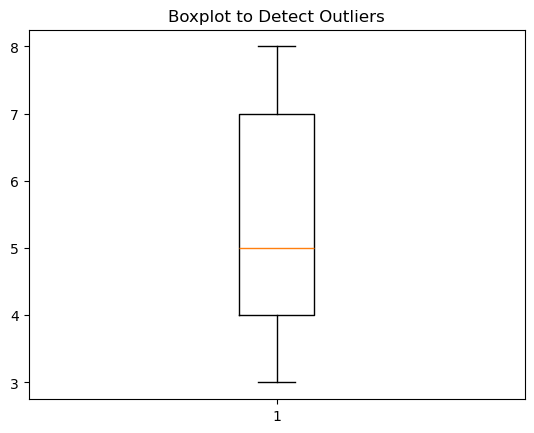

In [118]:
# Physical Activity Level
plt.boxplot(data['Physical Activity Level'])
plt.title("Boxplot to Detect Outliers")
plt.show()

# Stress Level
plt.boxplot(data['Stress Level'])
plt.title("Boxplot to Detect Outliers")
plt.show()


## Save Dataset

In [122]:
data.head()
data.info()

data.to_csv(r"C:\Users\HP\Desktop\Health Care.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   374 non-null    object
 1   Age                      374 non-null    int64 
 2   Job                      374 non-null    object
 3   Sleep Duration           374 non-null    int64 
 4   Quality of Sleep         374 non-null    int64 
 5   Physical Activity Level  374 non-null    int64 
 6   Stress Level             374 non-null    int64 
 7   BMI Category             374 non-null    object
 8   Blood Pressure           374 non-null    object
 9   Heart Rate               374 non-null    int64 
 10  Daily Steps              374 non-null    int64 
 11  Sleep Disorder           374 non-null    object
 12  Has Sleep Disorder       374 non-null    object
dtypes: int64(7), object(6)
memory usage: 40.9+ KB


# Define requirements

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\HP\Desktop\Health Care.csv")
data.head()

,Person ID,Gender,Age,Job,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Has Sleep Disorder
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,Normal,No
1,2,Male,28,Doctor,6,6,60,8,Normal Weight,125/80,75,10000,Normal,No
2,3,Male,28,Doctor,6,6,60,8,Normal Weight,125/80,75,10000,Normal,No
3,4,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes


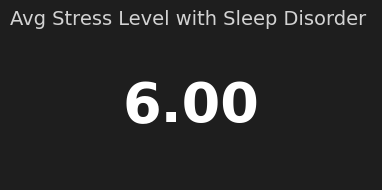

In [2]:
# What is the average stress level among people who have a sleep disorder?

avg = data['Has Sleep Disorder'] == 'Yes'
avgst = data[avg]['Stress Level'].mean()
avgst = round(avgst)

fig, ax = plt.subplots(figsize=(2,2))

fig.patch.set_facecolor('#1e1e1e')    
ax.set_facecolor('#2e2e2e')             

ax.text(0.5, 0.5, f"{avgst:.2f}",
        fontsize=40, ha='center', va='center',
        color='white', weight='bold')

ax.set_title("Avg Stress Level with Sleep Disorder ",
             fontsize=14, color='lightgray')

ax.axis('off')

plt.tight_layout()
plt.show()


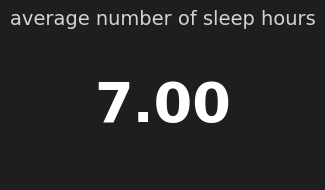

In [3]:
# What is the average number of sleep hours among individuals?

avg = round(data['Sleep Duration'].mean())

fig ,ax = plt.subplots(figsize=(2,2))
ax.text(0.5,0.5,f"{avg:.2f}",
        fontsize=40, ha='center', va='center',
        color='white', weight='bold')

ax.set_title('average number of sleep hours',fontsize=14, color='lightgray')
ax.axis('off')

fig.patch.set_facecolor('#1e1e1e')    
ax.set_facecolor('#2e2e2e')  

plt.tight_layout()
plt.show()


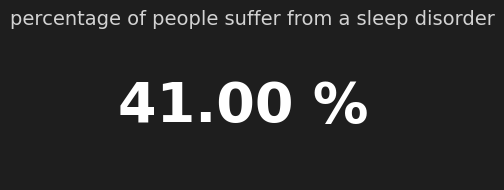

In [4]:
# What percentage of people suffer from a sleep disorder? 

counter = data[data['Has Sleep Disorder'] == 'Yes']['Has Sleep Disorder'].count()
counter = round((counter / data['Person ID'].count())* 100)
counter

fig ,ax = plt.subplots(figsize=(2,2))
ax.text(0.5,0.5,f"{counter:.2f} % ",
        fontsize=40, ha='center', va='center',
        color='white', weight='bold')

ax.set_title('percentage of people suffer from a sleep disorder',fontsize=14, color='lightgray')
ax.axis('off')

fig.patch.set_facecolor('#1e1e1e')    
ax.set_facecolor('#2e2e2e')  

plt.tight_layout()
plt.show()


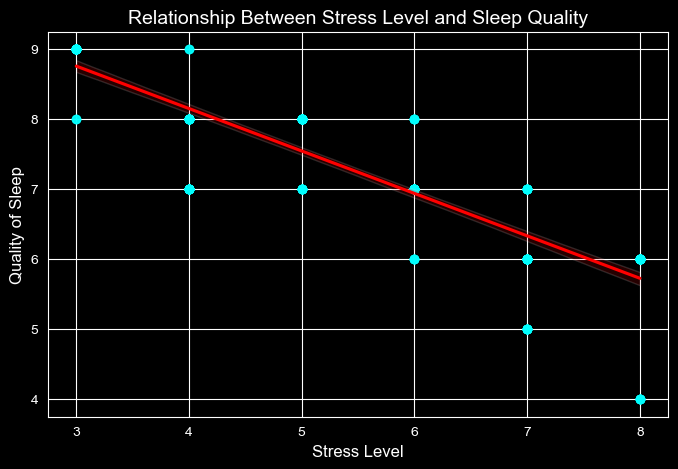

In [6]:
# Is there a relationship between stress level and sleep quality?

plt.figure(figsize=(8, 5))
sns.regplot(data=data, x='Stress Level', y='Quality of Sleep', scatter_kws={'color':'cyan'}, line_kws = {'color':'red'})
sns.set_style("darkgrid")
plt.style.use("dark_background")

plt.title("Relationship Between Stress Level and Sleep Quality", fontsize=14)
plt.xlabel("Stress Level",fontsize = 12)
plt.ylabel("Quality of Sleep",fontsize = 12)
plt.grid(True)
plt.show()

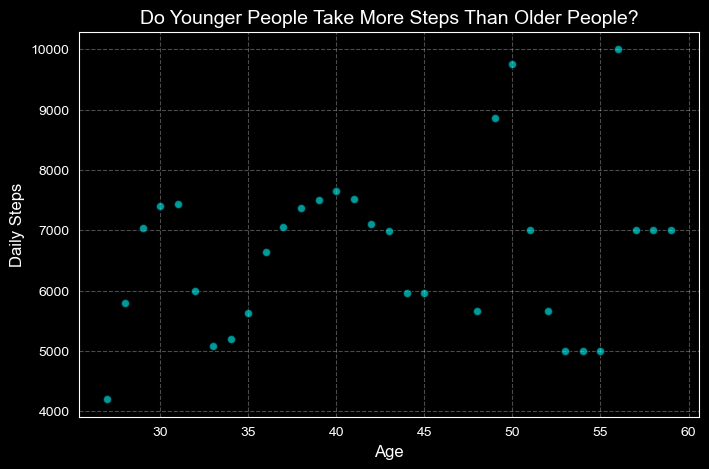

In [40]:
# Do younger people take more steps than older people? 

grouped = data.groupby('Age')['Daily Steps'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.scatter(grouped.index, grouped.values, color='cyan', edgecolor='black', alpha=0.6)
plt.title("Do Younger People Take More Steps Than Older People?", fontsize=14, color='white')
plt.xlabel("Age", fontsize=12, color='white')
plt.ylabel("Daily Steps", fontsize=12, color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.style.use("dark_background")   
plt.show()


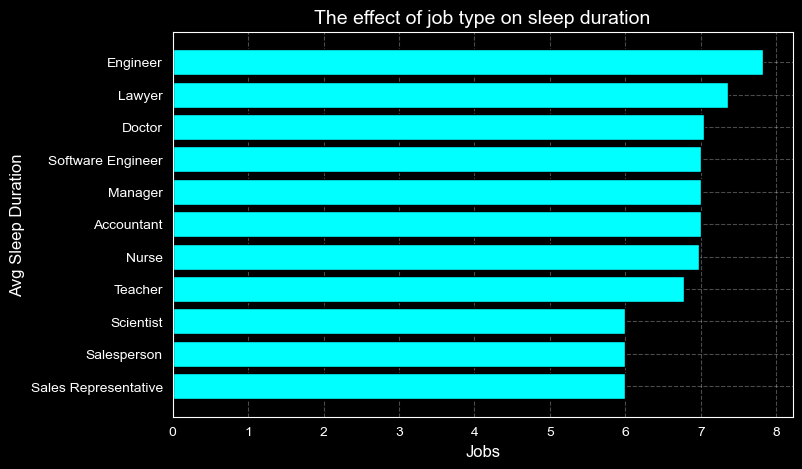

In [38]:
# Does job type affect Avg sleep duration?

groubed = data.groupby('Job')['Sleep Duration'].mean().sort_values()
plt.figure(figsize = (8,5))
plt.barh(groubed.index,groubed.values,color = 'cyan',edgecolor='black',)
plt.title("The effect of job type on sleep duration", fontsize=14, color='white')
plt.xlabel("Jobs", fontsize=12, color='white')
plt.ylabel("Avg Sleep Duration", fontsize=12, color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.style.use("dark_background")  # Optional for dark mode
plt.show()

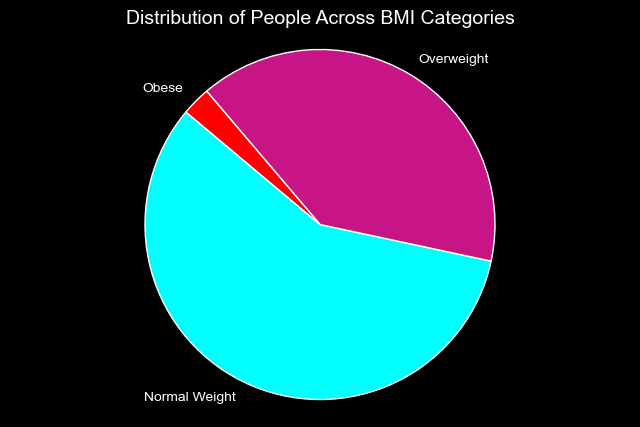

In [101]:
# What is the distribution of people across BMI categories (Normal, Overweight, etc.)?

group = data['BMI Category'].value_counts()

plt.style.use("dark_background")
plt.figure(figsize = (8,5))
plt.pie( group.values,labels = group.index ,
    startangle=140,colors = ['cyan', '#C71585', 'r'])
plt.title("Distribution of People Across BMI Categories", fontsize=14)
plt.axis('equal') 
plt.show()

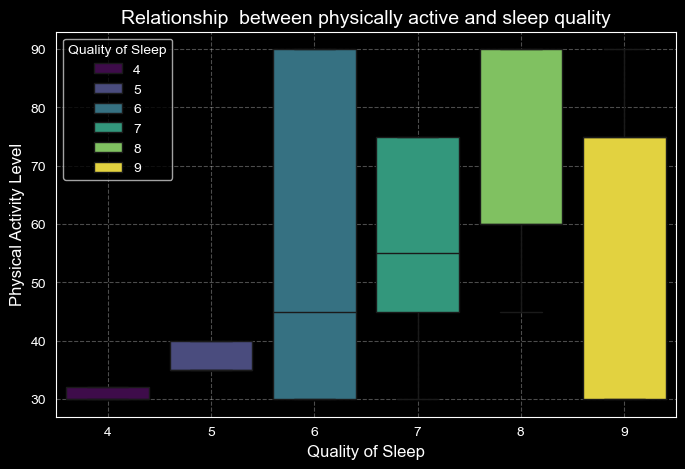

In [87]:
# Do physically active people have better sleep quality?

plt.style.use("dark_background")
plt.figure(figsize = (8,5))
sns.boxplot(data = data,x = data['Quality of Sleep'],y = data['Physical Activity Level'],hue ='Quality of Sleep',  palette='viridis')
plt.title("Relationship  between physically active and sleep quality", fontsize=14, color='white')
plt.xlabel("Quality of Sleep", fontsize=12, color='white')
plt.ylabel("Physical Activity Level", fontsize=12, color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.style.use("dark_background")   
plt.show()


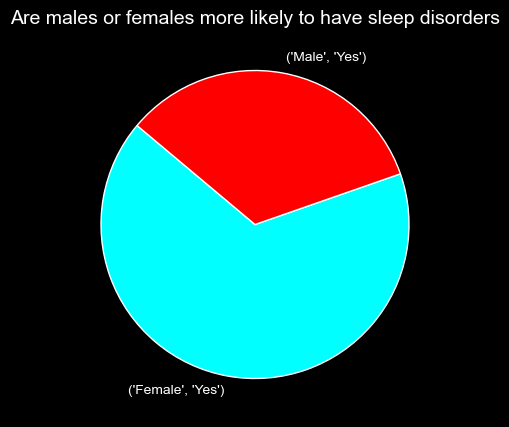

In [95]:
# Are males or females more likely to have sleep disorders?
data1 = data['Has Sleep Disorder'] == 'Yes'
group = data[data1].groupby('Gender')['Has Sleep Disorder'].value_counts()

plt.style.use("dark_background")
plt.figure(figsize = (8,5))
plt.pie( group.values,labels = group.index ,
    startangle=140,colors = ['cyan', 'r'])
plt.title("Are males or females more likely to have sleep disorders", fontsize=14) 
plt.show()

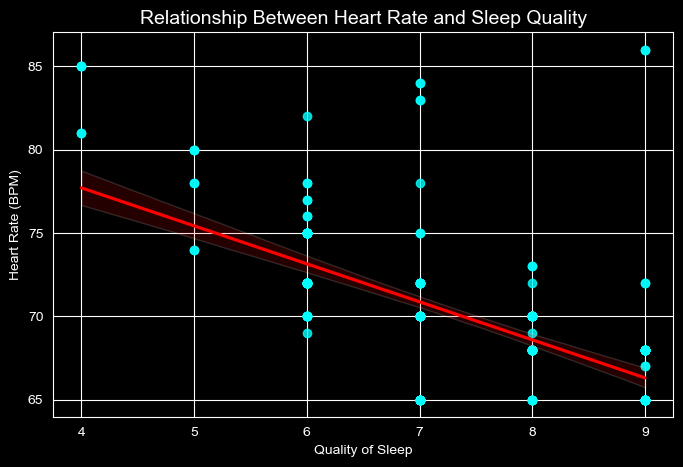

In [104]:
# Is there a connection between heart rate and sleep quality?
 
plt.figure(figsize=(8, 5))
sns.regplot(data=data,x='Quality of Sleep',y='Heart Rate',scatter_kws={'color': 'cyan'},line_kws={'color': 'red'})
plt.title("Relationship Between Heart Rate and Sleep Quality", fontsize=14)
plt.ylabel("Heart Rate (BPM)")
plt.xlabel("Quality of Sleep")
plt.grid(True)
plt.show()

